<a href="https://colab.research.google.com/github/harshit7271/Deep_learning_with_PyTorch/blob/main/PyTorch_Workflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**

Let's explore an example PyTorch end-to-end workflow

RESOURCES (the book i am going to folow here) :
* Book version of Notebook - http://www.learnpytorch.io/01_pytorch_workflow/



In [13]:
import torch
from torch import nn  # nn contain PyTorch's all of the building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch Versin
torch.__version__

'2.8.0+cu126'

# **Data Preparing and loading**

>**Data can be almost anything in ML**
* Excel spredsheet
* Image of any kind
* Videos
* Audio Like SINGS or PODCASTS
* DNA
* Text

**Machine Learning broadly a game of two parts :**    
1. Get data into numerical representation.
2. Build a model to learn patterns in that numeraical representation.

>*TO showcase this, lets create some KNOWN data using the linear Regression formula*

> We'll use a linear regresssion formula to make a straight line with *known* **Parameters**



In [14]:
# Lets create known parameters

weight = 0.5
bias =0.3

# Create
start = 0
end = 1
step = 0.02
X =  torch.arange(start,end,step).unsqueeze(dim=1)  # unsqueeze adds the extra dim to the tensor
y = weight * X + bias

X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900]]))

In [15]:
len(X), len(y)

(50, 50)

# **Splitting Data into training and test sets (One of the most important concepts in ML in general)**

Let's create training and testing set with out data

In [16]:
# Create train test Split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Let's visualize this training and testing data

In [25]:
def plot_prediction(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):

   plt.figure(figsize=(10,7))
   plt.scatter(train_data, train_labels, c="r", s=4, label="Training data")
   plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

# Check if there are predictions?

   if predictions is not None:
     plt.scatter(test_data, predictions, c="y", s=4, label="Predictions")

   plt.legend(prop={"size":14});

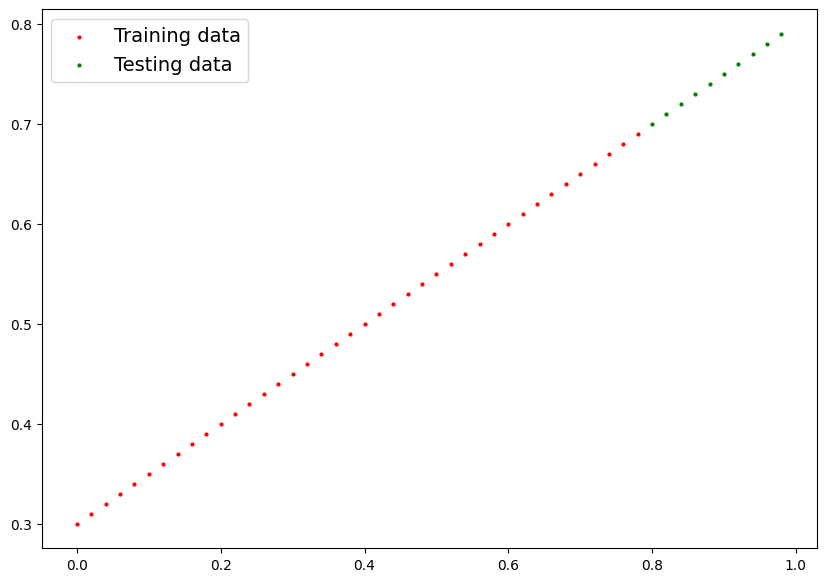

In [27]:
plot_prediction();

# **Building the model**
**My first PyTorch model**
>What our model does:

 1. Start with random values(weights and bias)
 2. Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights and bias values used to create the data)

 > these thing happen through Gradient Descent and Back Propagation

In [36]:
from torch import nn

# Create linear Regression model class

class LinearRegressionModel(nn.Module):         # almost everything in Pytorch inherits from nn.model
  def __init__(self):
    super().weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype = torch.float))    # though requires_grad = True is a default parameter we don't need to define it

    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype = torch.float))

    # Foward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # 'x' is the input data
      return self.weights *x + self.bias    # this is the linear regression formula

(np.float64(-0.5), np.float64(1805.5), np.float64(749.5), np.float64(-0.5))

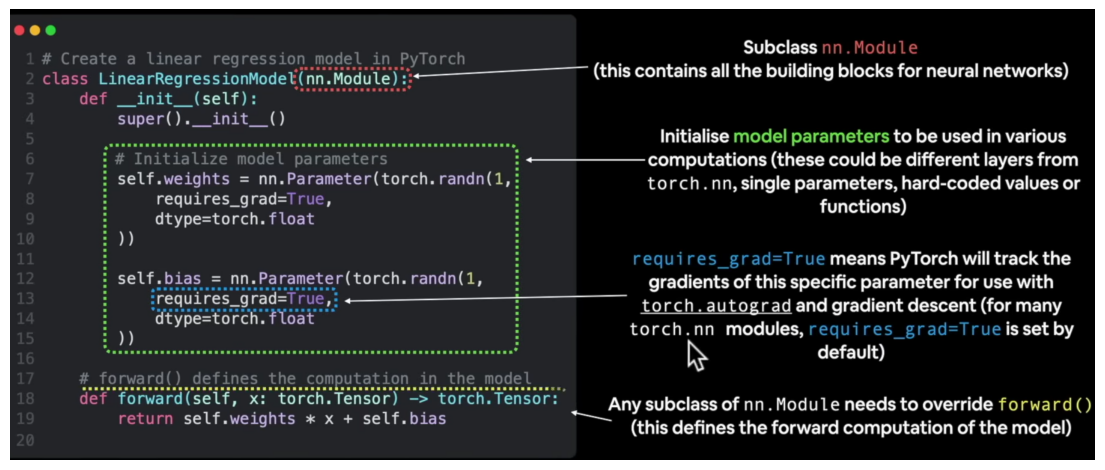

In [35]:
import matplotlib.image as mpimg
plt.figure(figsize=(14,7))
img = mpimg.imread('/content/Screenshot 2025-10-16 225945.png')


plt.imshow(img)
plt.axis('off')